<a href="https://colab.research.google.com/github/Dije-7/Word-Generator-using-Generated-Context-Probability/blob/main/Copy_of_WordGeneratorusingPOS_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
import re
import unicodedata
import string
import pandas as pd
import numpy as np
import math
import random

In [2]:
text = open('holmes.txt').read().lower()

In [3]:
text = (unicodedata.normalize('NFKD',text).encode('ascii', 'ignore').decode('utf-8', 'ignore'))

In [4]:
text = re.sub('\n', ' ', text)

In [5]:
text = re.sub(r'\s+', ' ', text)

In [6]:
text_list = re.split('[?!.,]', text)

In [7]:
text_list = [x.lower().translate(str.maketrans(' ', ' ', string.punctuation)).strip() for x in text_list]

In [8]:
new_list = list(filter(None, text_list))

In [9]:
new_list

['project gutenbergs the adventures of sherlock holmes',
 'by arthur conan doyle this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever',
 'you may copy it',
 'give it away or reuse it under the terms of the project gutenberg license included with this ebook or online at www',
 'gutenberg',
 'net title the adventures of sherlock holmes author arthur conan doyle posting date april 18',
 '2011 ebook 1661 first posted november 29',
 '2002 language english  start of this project gutenberg ebook the adventures of sherlock holmes  produced by an anonymous project gutenberg volunteer and jose menendez the adventures of sherlock holmes by sir arthur conan doyle i',
 'a scandal in bohemia ii',
 'the redheaded league iii',
 'a case of identity iv',
 'the boscombe valley mystery v',
 'the five orange pips vi',
 'the man with the twisted lip vii',
 'the adventure of the blue carbuncle viii',
 'the adventure of the speckled band ix',
 'the adventure of th

In [10]:
import spacy

In [11]:
nlp = spacy.load("en_core_web_sm")

In [12]:
for token in nlp('offices of the league 7 popes court fleet street'):
  print(token.text, token.pos_, sep=" ")

offices NOUN
of ADP
the DET
league NOUN
7 NUM
popes NOUN
court PROPN
fleet PROPN
street PROPN


In [13]:
pos_list = []
text_list_2 = []
for sentence in text_list:
  pos = []
  t = []
  for token in nlp(sentence):
    pos.append(token.pos_)
    t.append(token.text)
  pos_list.append(pos)
  text_list_2.append(t)

In [14]:
pos_list_2 = []
for pos in pos_list:
  trigrams = list(nltk.ngrams(pos, 3))
  pos_list_2.extend(trigrams)

In [15]:
text_list_3 = []
for t in text_list_2:
  trigrams = list(nltk.ngrams(t, 3))
  text_list_3.extend(trigrams)

In [16]:
pos_list_2

[('NOUN', 'VERB', 'DET'),
 ('VERB', 'DET', 'NOUN'),
 ('DET', 'NOUN', 'ADP'),
 ('NOUN', 'ADP', 'NOUN'),
 ('ADP', 'NOUN', 'NOUN'),
 ('ADP', 'PROPN', 'PROPN'),
 ('PROPN', 'PROPN', 'NOUN'),
 ('PROPN', 'NOUN', 'DET'),
 ('NOUN', 'DET', 'NOUN'),
 ('DET', 'NOUN', 'AUX'),
 ('NOUN', 'AUX', 'ADP'),
 ('AUX', 'ADP', 'DET'),
 ('ADP', 'DET', 'NOUN'),
 ('DET', 'NOUN', 'ADP'),
 ('NOUN', 'ADP', 'PRON'),
 ('ADP', 'PRON', 'ADV'),
 ('PRON', 'ADV', 'ADP'),
 ('ADV', 'ADP', 'DET'),
 ('ADP', 'DET', 'NOUN'),
 ('DET', 'NOUN', 'CCONJ'),
 ('NOUN', 'CCONJ', 'ADP'),
 ('CCONJ', 'ADP', 'ADV'),
 ('ADP', 'ADV', 'PRON'),
 ('ADV', 'PRON', 'NOUN'),
 ('PRON', 'NOUN', 'ADV'),
 ('PRON', 'AUX', 'VERB'),
 ('AUX', 'VERB', 'PRON'),
 ('VERB', 'PRON', 'ADV'),
 ('PRON', 'ADV', 'CCONJ'),
 ('ADV', 'CCONJ', 'VERB'),
 ('CCONJ', 'VERB', 'PRON'),
 ('VERB', 'PRON', 'ADP'),
 ('PRON', 'ADP', 'DET'),
 ('ADP', 'DET', 'NOUN'),
 ('DET', 'NOUN', 'ADP'),
 ('NOUN', 'ADP', 'DET'),
 ('ADP', 'DET', 'NOUN'),
 ('DET', 'NOUN', 'PROPN'),
 ('NOUN', 'PROPN'

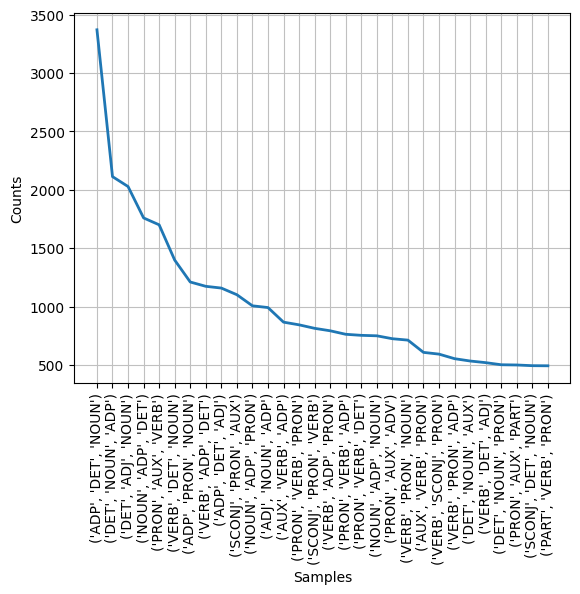

In [17]:
freq_tri = nltk.FreqDist(pos_list_2)
freq_tri.plot(30, cumulative=False)
print("Most common trigrams: ", freq_tri.most_common(5))

In [18]:
cfdist = nltk.ConditionalFreqDist()
for w1, w2, w3 in pos_list_2:
  cfdist[(w1, w2)][w3] += 1

Most common trigrams:  [(('ADP', 'DET', 'NOUN'), 3371), (('DET', 'NOUN', 'ADP'), 2113), (('DET', 'ADJ', 'NOUN'), 2028), (('NOUN', 'ADP', 'DET'), 1759), (('PRON', 'AUX', 'VERB'), 1700)]


In [19]:
for w1_w2 in cfdist:
  total_count = float(sum(cfdist[w1_w2].values()))
  for w3 in cfdist[w1_w2]:
    cfdist[w1_w2][w3] /= total_count

In [20]:
def predict_word(prev_words):
  w_w = {}
  for key, prob in dict(cfdist[prev_words[0], prev_words[1]]).items():
    w_w[key] = prob

  print(w_w)
  return max(w_w, key=lambda x:w_w[x])

In [21]:
predict_word(['DET', 'NUM'])

{'PROPN': 0.01282051282051282, 'ADV': 0.01282051282051282, 'CCONJ': 0.038461538461538464, 'NOUN': 0.5641025641025641, 'PRON': 0.01282051282051282, 'ADP': 0.11538461538461539, 'VERB': 0.0641025641025641, 'DET': 0.038461538461538464, 'ADJ': 0.11538461538461539, 'NUM': 0.01282051282051282, 'AUX': 0.01282051282051282}


'NOUN'

In [22]:
data = []
for i in range(len(text_list_3)):
  words = text_list_3[i]
  tags = pos_list_2[i]
  row = {'word': words[2], 'pos': tags[2], 'prev1': words[0], 'prev2': words[1]}
  data.append(row)

In [23]:
df = pd.DataFrame(data)

In [24]:
df

,word,pos,prev1,prev2
0,the,DET,project,gutenbergs
1,adventures,NOUN,gutenbergs,the
2,of,ADP,the,adventures
3,sherlock,NOUN,adventures,of
4,holmes,NOUN,of,sherlock
...,...,...,...,...
79430,to,PART,email,newsletter
79431,hear,VERB,newsletter,to
79432,about,ADP,to,hear
79433,new,ADJ,hear,about


In [25]:
from keras.preprocessing.text import Tokenizer

In [26]:
df.to_csv('tagged_df.csv', index=False)

In [27]:
df2 = pd.read_csv('tagged_df.csv')

In [28]:
tokenizer1 = Tokenizer(oov_token="<OOV>")

tokenizer1.fit_on_texts(df2["pos"])
vocab_pos = tokenizer1.word_index
word_sequences = tokenizer1.texts_to_sequences(df2["pos"])
df2['pos'] = [item for sublist in word_sequences for item in sublist]

tokenizer2 = Tokenizer(oov_token="<OOV>")
tokenizer2.fit_on_texts(df2["prev1"])
vocab_prev1 = tokenizer2.word_index
df2['prev1'] = tokenizer2.texts_to_sequences(df2["prev1"])

tokenizer3 = Tokenizer(oov_token="<OOV>")
tokenizer3.fit_on_texts(df2["prev2"])
vocab_prev2 = tokenizer3.word_index
df2['prev2'] = tokenizer3.texts_to_sequences(df2["prev2"])

df2

,word,pos,prev1,prev2
0,the,6,[107],[3594]
1,adventures,2,[3392],[2]
2,of,3,[2],[814]
3,sherlock,2,[827],[3]
4,holmes,2,[6],[188]
...,...,...,...,...
79430,to,11,[2278],[7078]
79431,hear,4,[6728],[4]
79432,about,3,[5],[264]
79433,new,7,[265],[73]


In [29]:
mask = df2["prev1"].apply(lambda x: len(x) > 0)
df2 = df2.loc[mask]
mask = df2["prev2"].apply(lambda x: len(x) > 0)
df2 = df2.loc[mask]
df2

,word,pos,prev1,prev2
0,the,6,[107],[3594]
1,adventures,2,[3392],[2]
2,of,3,[2],[814]
3,sherlock,2,[827],[3]
4,holmes,2,[6],[188]
...,...,...,...,...
79430,to,11,[2278],[7078]
79431,hear,4,[6728],[4]
79432,about,3,[5],[264]
79433,new,7,[265],[73]


In [30]:
df2['prev2']  = [item for sublist in df2['prev2'] for item in sublist]
df2['prev1']  = [item for sublist in df2['prev1'] for item in sublist]

In [31]:
mask = df2["word"].apply(lambda x: x.strip())
df2 = df2[mask != '']

In [32]:
tokenizer4 = Tokenizer(oov_token="<OOV>")
tokenizer4.fit_on_texts(df2["word"])
vocab_word = tokenizer4.word_index
data_word = df2["word"].dropna().values
# df2["word"] = tokenizer4.texts_to_sequences(df2["word"])
# mask = df2["word"].apply(lambda x: len(x) > 0)
# df2 = df2.loc[mask]
# df2['word'] = [item for sublist in df2['word'] for item in sublist]

In [33]:
(df2['word'] == '').sum()

0

In [34]:
len(vocab_word)

7914

In [35]:
from keras.layers import Embedding, Input, Concatenate, Dense, Flatten
from keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
# vocab_size = 7914  # size of the vocabulary

# # define the input layers
# input_prev1 = Input(shape=(1,), dtype="int32")
# input_prev2 = Input(shape=(1,), dtype="int32")
# input_pos = Input(shape=(1,), dtype="int32")

# # define the embedding layers for each input
# embedding_prev1 = Dense(64)(input_prev1)
# embedding_prev2 = Dense(64)(input_prev2)
# embedding_pos = Dense(64)(input_pos)

# # concatenate the embedding layers
# concatenated = Concatenate()([embedding_prev1, embedding_prev2, embedding_pos])

# # define the hidden layer and the output layer
# hidden_layer = Dense(64, activation="relu")(concatenated)
# output_layer = Dense(vocab_size, activation="softmax")(hidden_layer)

# # create the model
# model = Model(inputs=[input_prev1, input_prev2, input_pos], outputs=output_layer)

# # compile the model
# model.compile(optimizer="adam", loss="categorical_crossentropy",  metrics=['accuracy'])

In [36]:
from keras.layers import LSTM, Dropout, Reshape, Bidirectional

In [37]:
input_prev1 = Input(shape=(1,), dtype="int32")
input_prev2 = Input(shape=(1,), dtype="int32")
input_pos = Input(shape=(1,), dtype="int32")

embedding_prev1 = Dense(64)(input_prev1)
embedding_prev2 = Dense(64)(input_prev2)
embedding_pos = Dense(64)(input_pos)

concatenated = Concatenate()([embedding_prev1, embedding_prev2, embedding_pos])
reshaped = Reshape((-1, 192))(concatenated)

lstm_layer1 = Bidirectional(LSTM(128, return_sequences=True))(reshaped)
lstm_layer2 = LSTM(128)(lstm_layer1)

dense_layer1 = Dense(128, activation="relu")(lstm_layer2)
dropout_layer1 = Dropout(0.2)(dense_layer1)
dense_layer2 = Dense(64, activation="relu")(dropout_layer1)
dropout_layer2 = Dropout(0.2)(dense_layer2)
dense_layer3 = Dense(32, activation="relu")(dropout_layer2)

output_layer = Dense(len(vocab_word.keys()), activation="softmax")(dense_layer3)

model2 = Model(inputs=[input_pos, input_prev1, input_prev2], outputs=output_layer)

model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [38]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 64)                   128       ['input_1[0][0]']             
                                                                                              

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
data_word = df2["word"].dropna().values
ohe = OneHotEncoder(categories=[list(vocab_word.keys())], sparse_output=True)
data_word_onehot = []

In [41]:
data_word_onehot_2 = ohe.fit_transform(data_word.reshape(-1,1))

In [42]:
len(vocab_word.keys())

7914

In [43]:
X_train, X_val, y_train, y_val = train_test_split(df2[['pos','prev1','prev2']], data_word_onehot_2, test_size=0.2)

In [44]:
model2.fit([df2["prev1"].values, df2["prev2"].values, df2["pos"].values], data_word_onehot_2.toarray(), epochs=21, batch_size=64, validation_data=([X_val["prev1"].values, X_val["prev2"].values, X_val["pos"].values], y_val.toarray()))

Epoch 1/21
1241/1241 [==============================] - 54s 37ms/step - loss: 6.7336 - accuracy: 0.0689 - val_loss: 6.4952 - val_accuracy: 0.0708
Epoch 2/21
1241/1241 [==============================] - 46s 37ms/step - loss: 6.3938 - accuracy: 0.0760 - val_loss: 6.1668 - val_accuracy: 0.0819
Epoch 3/21
1241/1241 [==============================] - 43s 35ms/step - loss: 5.9760 - accuracy: 0.0964 - val_loss: 5.6188 - val_accuracy: 0.1048
Epoch 4/21
1241/1241 [==============================] - 44s 36ms/step - loss: 5.4111 - accuracy: 0.1221 - val_loss: 5.1110 - val_accuracy: 0.1285
Epoch 5/21
1241/1241 [==============================] - 45s 36ms/step - loss: 5.0235 - accuracy: 0.1366 - val_loss: 4.8224 - val_accuracy: 0.1431
Epoch 6/21
1241/1241 [==============================] - 46s 37ms/step - loss: 4.7950 - accuracy: 0.1464 - val_loss: 4.6950 - val_accuracy: 0.1564
Epoch 7/21
1241/1241 [==============================] - 44s 36ms/step - loss: 4.6772 - accuracy: 0.1592 - val_loss: 4.5542 -

In [45]:
pred = model2.predict([X_val["prev1"].values, X_val["prev2"].values, X_val["pos"].values])

497/497 [==============================] - 6s 7ms/step


In [46]:
pred

array([[1.1152816e-11, 1.2855409e-07, 2.7713034e-01, ..., 1.5142523e-07,
        4.1961314e-22, 4.7517090e-12],
       [1.4084745e-08, 1.4402388e-04, 2.3105571e-01, ..., 1.0270219e-05,
        3.5469027e-14, 2.7630740e-08],
       [1.2589592e-11, 4.6697176e-01, 2.3938218e-09, ..., 9.7259059e-19,
        6.2325208e-21, 2.2262645e-11],
       ...,
       [1.5817882e-10, 1.2684409e-03, 3.1934508e-08, ..., 2.5743199e-15,
        4.3696985e-10, 3.2948987e-11],
       [4.3983124e-09, 1.2020257e-09, 3.4785829e-04, ..., 4.0476666e-09,
        3.2390351e-11, 4.4978945e-09],
       [5.9773509e-14, 5.5239028e-01, 2.2413803e-12, ..., 1.9883350e-26,
        2.9867053e-23, 1.3107655e-17]], dtype=float32)

In [47]:
import pickle

model2.save('model_2_3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
pred

array([[2.00896189e-09, 4.24486046e-09, 4.39589254e-09, ...,
        5.79349530e-14, 1.65030160e-11, 2.46291432e-10],
       [6.42642339e-09, 1.64217894e-07, 4.66116535e-06, ...,
        1.12656515e-08, 2.11536701e-07, 5.66264058e-09],
       [4.88520058e-10, 6.69422462e-10, 1.48792506e-05, ...,
        7.41106713e-16, 1.00432236e-13, 6.02015035e-11],
       ...,
       [5.88647273e-12, 2.03098294e-13, 1.17347269e-11, ...,
        1.56902451e-16, 9.84109560e-16, 8.32099672e-15],
       [1.05467987e-11, 1.10799782e-02, 1.83553947e-20, ...,
        1.51749547e-20, 4.02591589e-12, 5.20445895e-16],
       [6.47127924e-12, 2.49977204e-13, 1.31149735e-11, ...,
        1.94646874e-16, 1.16497788e-15, 9.88406473e-15]], dtype=float32)

In [48]:
key = [key for key, value in vocab_word.items() if value == 100]
print(key)

['such']


In [49]:
df.describe()

,word,pos,prev1,prev2
count,79435,79435,79435,79435
unique,7919,17,6729,7079
top,the,NOUN,the,the
freq,4613,16499,4327,5269


In [50]:
len(vocab_prev1)

6728

In [51]:
df2[['pos','prev1','prev2']].shape

(79396, 3)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_res = load_model('model_2_3.h5')

result = model_res.predict([X_val["pos"].values, X_val["prev1"].values, X_val["prev2"].values])

497/497 [==============================] - 3s 4ms/step


In [ ]:
result.shape

(15880, 7914)

In [ ]:
ind = np.argmax(result[12])

In [ ]:
ind

38

In [ ]:
ind = np.argmax(y_val[12])

In [ ]:
ind

4

In [ ]:
key = [key for key, value in vocab_word.items() if value == ind]
print(key)

['to']


In [ ]:
key = [key for key, value in vocab_word.items() if value == ind]
print(key)

['to']


In [52]:
# from sklearn.metrics import accuracy_score

In [53]:
# res = [np.argmax(x) for x in pred]

In [54]:
# pred = [np.argmax(x) for x in y_val]

In [55]:
# val_accuracy = accuracy_score(pred, res)

In [94]:
text = input("Write 2 words to begin new word generation :")

Write 2 words to begin new word generation :this is


In [95]:
text = (unicodedata.normalize('NFKD',text).encode('ascii', 'ignore').decode('utf-8', 'ignore'))
text = re.sub('\n', ' ', text)
text = re.sub(r'\s+', ' ', text)
text_list = re.split('[?!.,]', text)
text_list = [x.lower().translate(str.maketrans(' ', ' ', string.punctuation)).strip() for x in text_list]

In [96]:
def predict_word(prev_words):
  w_w = {}
  for key, prob in dict(cfdist[prev_words[0], prev_words[1]]).items():
    w_w[key] = prob
  print(w_w)
  sorted_items = sorted(w_w.items(), key=lambda x: x[1], reverse=True)
  top_3_items = sorted_items[:3]
  result_dict = dict(top_3_items)
  return result_dict

In [97]:
prev_pos = []
prev_text = []
for token in nlp(text_list[0]):
  print(token)
  prev_pos.append(token.pos_)
  prev_text.append(token.text)

this
is


In [98]:
pos_tag_new = predict_word(prev_pos)

{'VERB': 0.37037037037037035, 'ADV': 0.15773420479302833, 'PART': 0.10871459694989107, 'AUX': 0.10435729847494553, 'ADJ': 0.08213507625272332, 'ADP': 0.03420479302832244, 'NOUN': 0.005010893246187364, 'PRON': 0.04989106753812636, 'NUM': 0.00261437908496732, 'DET': 0.06993464052287582, 'CCONJ': 0.0032679738562091504, 'PROPN': 0.003485838779956427, 'SCONJ': 0.008061002178649237, 'INTJ': 0.00021786492374727668}


In [99]:
prev_text

['this', 'is']

In [100]:
a = np.repeat(np.array(prev_text[0], dtype=str), 3)
b = np.repeat(np.array(prev_text[1], dtype=str), 3)
c = np.array(list(pos_tag_new.keys()), dtype=str)

In [101]:
c

array(['VERB', 'ADV', 'PART'], dtype='<U4')

In [102]:
c = np.array(tokenizer1.texts_to_sequences(c.reshape(-1))).reshape(-1)
a = np.array(tokenizer2.texts_to_sequences(a.reshape(-1))).reshape(-1)
b = np.array(tokenizer3.texts_to_sequences(b.reshape(-1))).reshape(-1)

In [103]:
[a, b, c]

[array([32, 32, 32]), array([12, 12, 12]), array([ 4,  9, 11])]

In [104]:
pred = model2.predict([a,b,c])

1/1 [==============================] - 0s 38ms/step


In [105]:
for p in pred:
  t = [key for key, value in vocab_word.items() if value == np.argmax(p)]
  print(t)

['with']
['her']
['had']
